# <center> INTRODUÇÃO A DATASCIENCE </center> 

#### Fernando A. Correia dos S. Junior <br> João Vitor Chaves de Oliveira

Árvore geradora mínima problema valorar as arestas <br>
Por que é necessário ser acíclico? O grafo? 

## ToDo List

- **E dos demais, quantos tem uma citação? e duas?  ## Só chamar out_degree ou in_degree passando 1,2 ...**
- **And after that?How many has more than 10 citations? And 100? **
- **Distribuição de graus, comparação por ano e com o total**
- **Distribuição de número de componentes, comparação por ano e com o total**
- Distribuição da média de nós por componentes, comparação por ano e com o total
- Comparar medidas de centralidade, escolher 3 casos e plotar a distribuição das métricas ao longo do tempo.
- **Hubs e Authorities** 

In [1]:
import networkx as nx
import json
import random
import re
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
class Graph():
    def __init__(self, path, graph_name="grafo-normalizado"):
        self.graph_name = graph_name
        self.GraphJSON = json.load(open(path)) 
        self.G = nx.DiGraph()


    def generateGraph(self): #Esta é a função que gera o grafo
        keys = self.GraphJSON.keys()
        for i in keys:
            values = self.GraphJSON[i]
            for j in values:
                self.G.add_edge(i,j)
        
    def getNumberOfEdges(self):
        return self.G.number_of_edges()

    def getNumberOfVertex(self):
        return self.G.number_of_nodes()
    
    def saveGraph(self):
        nx.write_graphml(self.G, path='%s.graphml' % self.graph_name)
        
    def centrality(self):
        centralities = nx.algorithms.degree_centrality(self.G)
        return centralities
    
    def betweenness_centrality(self):
        centralities = nx.algorithms.betweenness_centrality(self.G)
        return centralities
    
    def eigenvector_centrality(self):
        centralities = nx.algorithms.eigenvector_centrality_numpy(self.G)
        return centralities
    

    def in_degree(self, x): #Retorna a lista de vértices com grau de entrada x
        l = []
        for v in self.G.nodes():
            if self.G.in_degree(v) == x:
                l.append(v)
        return l
    
    def out_degree(self, x): #Retorna a lista de vértices com grau de saída x
        l = []
        for v in self.G.nodes():
            if self.G.out_degree(v) == x:
                l.append(v)
        return l
    
    def max_degree(self, arg): # arg = {int ou out} in para grau in e out para grau out
        maximum = -1
        if arg=='in':
            for v in self.G.nodes():
                degree = self.G.in_degree(v)
                if maximum < degree:
                    maximum = degree
        elif arg=='out':
            for v in self.G.nodes():
                degree = self.G.out_degree(v)
                if maximum < degree:
                    maximum = degree
        else:
            print(u"Entrada inválida")
        return maximum
    
    def nodes(self):
        return self.G.nodes
       
    def hubs_and_authorities(self):
        return nx.hits(self.G)
    
    def number_strongly_connected_component(self):
        return nx.number_strongly_connected_components(self.G)
        
    def degree_distribuition(self, title_year = ''):
        din = self.max_degree('in')
        dout = self.max_degree('out')
        MaxDegree = max(din,dout)
        values = np.zeros([MaxDegree+1,2])
        
        for i in range(MaxDegree+1):
            values[i][0] = len(self.in_degree(i))
            values[i][1] = len(self.out_degree(i))
        df = pd.DataFrame(values,columns=['Grau de entrada','Grau de Saída'])
        p = df.plot.bar()
        p.set_xlabel(u'Grau')
        p.set_ylabel(u'Número de vértices')
        p.set_title(u"Número de vértices por grau "+title_year)
            
        
    def showGraph(self): #plota o grafo mas não fica tão legal 
        nx.draw_networkx(self.G)
        plt.show()
        

### Importando o Arquivo para manipulação do grafo

In [3]:
G = Graph('janelas/aborto/aborto_citation_map.json') #Construtor passa o JSON
G.generateGraph() #Gera o grafo a partir do JSON
G.saveGraph() # SALVA O ARQUIVO, plotar na Gephi

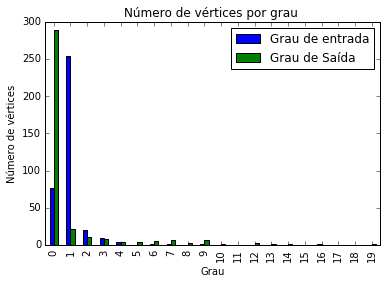

In [4]:
G.degree_distribuition()

In [5]:
G.number_strongly_connected_component()

368

In [6]:
print("Número total de vértices: %s " % len(G.nodes()))

Número total de vértices: 368 


#### 1. Quantos processos na rede não foram citados?

In [7]:
print("%s processos não são citados "%len(G.in_degree(0)))

77 processos não são citados 


#### 2. Quantos processos na rede não citam ninguém ?

In [8]:
print("%s processos não citam ninguém "%len(G.out_degree(0)))

289 processos não citam ninguém 


### Centralidades

In [9]:
centralities_degree = G.centrality()
#for i in centralities_degree:
#    print(centralities_degree[i])

In [10]:
centralities_betweenness = G.betweenness_centrality()
#for i in centralities_degree:
#    print(i, ' : ',centralities_betweenness[i])

In [11]:
centralities_eingenvector = G.eigenvector_centrality()
#for i in centralities_eingenvector:
#    print(centralities_eingenvector[i])

In [12]:
print(len(set(centralities_betweenness.values())))
centralities_betweenness = [(k, v) for k, v in centralities_betweenness.items()]
centralities_betweenness.sort(key=lambda x: x[1], reverse=True)
centralities_betweenness[:10]

2


[(u'hc 84935 stf', 5.955837465195575e-05),
 (u'rhc 82288 stf', 0.0),
 (u'hc 73686 stf', 0.0),
 (u'adc 12 stf', 0.0),
 (u're 596682 stf', 0.0),
 (u'ai 258067 stf', 0.0),
 (u'hc 83227 stf', 0.0),
 (u'hc 129673 stf', 0.0),
 (u'hc 82684 stf', 0.0),
 (u'hc 134889 stf', 0.0)]

In [20]:
for ano in range(2005, 2016, 2):
    G = Graph('janelas/aborto/dois_anos/aborto_citation_map_%s-%s.json' % (ano, ano + 1), "%s-%s" % (ano, ano + 1))
    G.generateGraph()
    G.saveGraph()

## Distribuição de vértices por grau (in/out) em cada ano.

In [17]:
G1 = Graph('janelas/aborto/dois_anos/aborto_citation_map_2005-2006.json')
G2 = Graph('janelas/aborto/dois_anos/aborto_citation_map_2007-2008.json')
G3 = Graph('janelas/aborto/dois_anos/aborto_citation_map_2009-2010.json')
G4 = Graph('janelas/aborto/dois_anos/aborto_citation_map_2011-2012.json')
G5 = Graph('janelas/aborto/dois_anos/aborto_citation_map_2013-2014.json')
G6 = Graph('janelas/aborto/dois_anos/aborto_citation_map_2015-2016.json')
graphs_per_year = {'2005-2006':G1,'2007-2008':G2,'2008-2009':G3,'2010-2011':G4,'2012-2013':G5,'2014-2015':G6}

In [18]:
for graph in graphs_per_year.values():
    graph.generateGraph()
    graph.saveGraph()

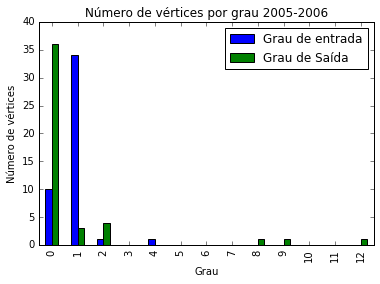

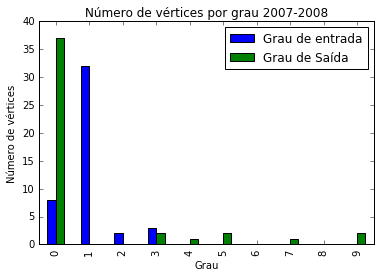

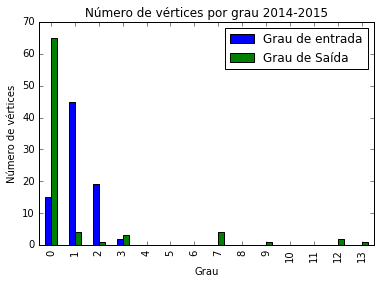

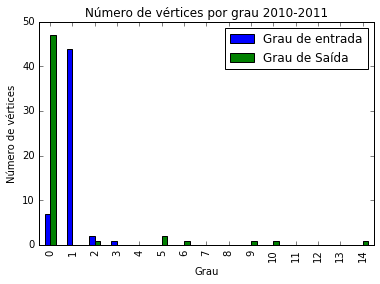

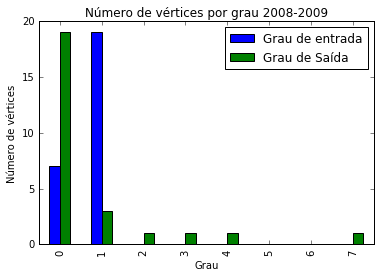

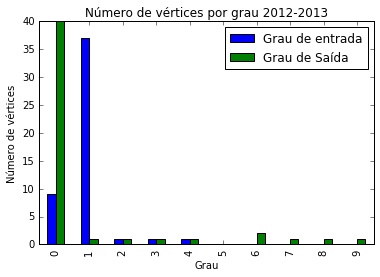

In [19]:
keys= list(graphs_per_year.keys())
for i,graph in enumerate(graphs_per_year.values()):
    graph.degree_distribuition(keys[i])

## Número de componentes por ano

In [21]:
print(keys)

['2005-2006', '2007-2008', '2014-2015', '2010-2011', '2008-2009', '2012-2013']


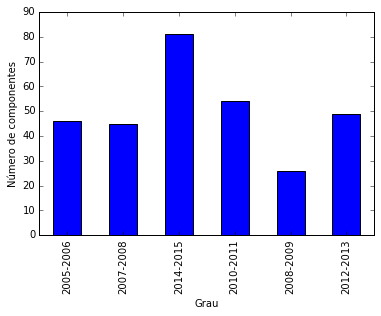

In [22]:
number_components = []
for graph in graphs_per_year.values():
    number_components.append(graph.number_strongly_connected_component())

#number_components_df = pd.DataFrame(np.array(number_components).reshape(1,6), columns=keys)
number_components_df = pd.DataFrame(np.array(number_components), index=keys)

p = number_components_df.plot.bar(legend=False)
p.set_xlabel('Grau')
p.set_ylabel(u'Número de componentes')

## Hubs and authorities

In [23]:
h,a = G.hubs_and_authorities() # Retorna dois dicionários com o vértice e sua taxa de hub e autoridade

In [24]:
hubs = list(h.items())
hubs.sort(key=lambda x: x[1], reverse=True)
hubs = [i for i in hubs if i[1] > 0]
print(hubs[:5])
print(len(hubs))
print(hubs)

[(u'hc 126560 stf', 0.4783461035553949), (u'hc 126559 stf', 0.4783461035553949), (u'hc 134889 stf', 0.04330778507046274), (u'are 891473 stf', 5.2121716346036954e-09), (u'are 881117 stf', 2.6060858173018473e-09)]
16
[(u'hc 126560 stf', 0.4783461035553949), (u'hc 126559 stf', 0.4783461035553949), (u'hc 134889 stf', 0.04330778507046274), (u'are 891473 stf', 5.2121716346036954e-09), (u'are 881117 stf', 2.6060858173018473e-09), (u'are 992478 stf', 2.3162065754051e-13), (u're 998092 stf', 1.7056937922955412e-13), (u're 866590 stf', 8.766623866221104e-14), (u'hc 138561 stf', 5.359224124326238e-22), (u'hc 126046 stf', 1.0717871066934263e-27), (u'hc 125969 stf', 1.0717871066934263e-27), (u'hc 129734 stf', 2.387851382587917e-36), (u'hc 131924 stf', 5.892211931549092e-55), (u'hc 135405 stf', 5.892211931549092e-55), (u'hc 130037 stf', 5.892211931549092e-55), (u'hc 126409 stf', 5.892211931549092e-55)]


In [25]:
aut = list(a.items())
aut.sort(key=lambda x: x[1], reverse=True)
aut = [i for i in aut if i[1] > 0]
print(aut[:5])
print(len(aut))
print(aut[-5:])

[(u'sum. 691 stf', 0.08645342083606726), (u'hc 85185 stf', 0.08270931463861837), (u'hc 86213 stf', 0.08270931463861837), (u'rhc 54663 stj', 0.08270931463861837), (u'hc 79238 stf', 0.08270931463861837)]
66
[(u'hc 126409 stf', 1.6577334327809443e-36), (u'hc 312525 stj', 1.2271764628886087e-54), (u'rhc 59567 stj', 1.2271764628886087e-54), (u'hc 320145 stj', 1.2271764628886087e-54), (u'rhc 69809 stj', 1.2271764628886087e-54)]
